<a href="https://colab.research.google.com/github/punch-bob/MathStatCalcTask/blob/main/MathStatCalcTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import math

In [91]:
task1Data = [-1.135, -0.592, -0.766, -1.177, -0.735, -1.717, 0.336, -1.140, -0.155, -2.048,
        -1.137, -2.147, -0.313, -0.056, -0.286, -0.829, -0.290, -0.639, -1.397, 0.362,
        -0.393, -1.347, -0.185, -0.715, -1.846, -0.038, -1.242, -0.387, -0.669, -0.997,
        -2.424, -1.103, -0.843, -0.552, -1.283, -1.026, -1.448, -0.231, -0.267, -0.769,
        -0.341, -1.874, -1.213, -2.168, -2.116, -0.886, -1.061, -0.937, 0.576, -0.636]
n1 = len(task1Data)
sigma = 0.5
alpha = -1

In [92]:
def printTaskNumber(n):
  print("Task #", n)

In [93]:
def getSampleMean():
  sampleMean = 0
  for number in task1Data:
    sampleMean += number
  return sampleMean / n1

In [94]:
def getSampleVariance(mathExpectation):
  sampleVarience = 0
  for number in task1Data:
    sampleVarience += (number - mathExpectation)**2
  return sampleVarience / n1

In [95]:
def getUnbiasedSampleVariance(mathExpectation):
  sampleVariance = getSampleVariance(mathExpectation)
  return sampleVariance * n1 / (n1 - 1)

$$№1$$
$$\vec{X} \sim N_{\alpha, \sigma^2}$$
$\text{a) }\overline{X} \sim N_{\alpha, \frac{\sigma^2}{n}}$

$G(\overline{X}, \alpha) = \frac{\overline{X} - \alpha}{\sqrt{\frac{\sigma^2}{n}}} \sim N_{0, 1} \text{ (Theorem on the properties of normal samples)}$

$P(\alpha^{-} \leq \sqrt{n}\frac{(\overline{X} - \alpha)}{\sigma} \leq \alpha^{+}) = 1 - \varepsilon$

\begin{cases}
    \phi_{0,1}(\alpha^{-}) = \frac{\varepsilon}{2}\\
    \phi_{0,1}(\alpha^{+}) = 1 - \frac{\varepsilon}{2}
\end{cases}

\begin{cases}
    \alpha^{-} = -\tau_{1 - \frac{\varepsilon}{2}}\\
    \alpha^{+} = \tau_{1 - \frac{\varepsilon}{2}}
\end{cases}

$P(-\tau_{1 - \frac{\varepsilon}{2}} \leq \sqrt{n}\frac{(\overline{X} - \alpha)}{\sigma} \leq \tau_{1 - \frac{\varepsilon}{2}}) = 1 - \varepsilon$

$P(\overline{X} - \frac{\sigma\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}} \leq \alpha \leq \overline{X} + \frac{\sigma\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}}) = 1 - \varepsilon$

$\text{Confidence interval for }\alpha\text{, with a known } \sigma^2:$

$$(\overline{X} - \frac{\sigma\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}};\overline{X} + \frac{\sigma\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}})$$



In [96]:
def buildConfidenceIntervalA():
  sampleMean = getSampleMean()
  alphaPlusArray = [2.575, 1.96, 1.645]
  
  for alphaPlus in alphaPlusArray:
    leftBorder = sampleMean - math.sqrt(sigma) * alphaPlus / math.sqrt(n1)
    rightBorder = sampleMean + math.sqrt(sigma) * alphaPlus / math.sqrt(n1)
    print("(", round(leftBorder, 3), ";", round(rightBorder, 3), ")")

$$№1$$
$$\vec{X} \sim N_{\alpha, \sigma^2}$$

$\text{b) }\overline{X} \sim N_{\alpha, \frac{\sigma^2}{n}}$

$G(\overline{X}, \alpha) = \frac{(\overline{X} - \alpha)\sqrt{n}}{S_0} \sim T_{n - 1}\text{ (Theorem on the properties of normal samples),   }S_0 = \sqrt{S_0^2}$

\begin{cases}
    T_{n - 1}(\alpha^{-}) = \frac{\varepsilon}{2}\\
    T_{n - 1}(\alpha^{+}) = 1 - \frac{\varepsilon}{2}
\end{cases}
$$\alpha^{+} = - \alpha^{-}$$

$P(-\alpha^{+} \leq \frac{(\overline{X} - \alpha)\sqrt{n}}{S_0} \leq \alpha^{+}) = 1 - \varepsilon$

$P(\overline{X} - \frac{\alpha^{+} S_0}{\sqrt{n}} \leq \alpha \leq \overline{X} + \frac{\alpha^{+} S_0}{\sqrt{n}}) = 1 - \varepsilon$

$\text{Confidence interval for }\alpha\text{, with a unknown } \sigma^2:$

$$(\overline{X} - \frac{\alpha^{+} S_0}{\sqrt{n}};\overline{X} + \frac{\alpha^{+} S_0}{\sqrt{n}})$$

In [97]:
def buildConfidenceIntervalB():
  sampleMean = getSampleMean()
  unbiasedSampleVariance = getUnbiasedSampleVariance(sampleMean)
  alphaPlusArray = [2.939, 2.312, 2.009]
  for alphaPlus in alphaPlusArray:
    leftBorder = sampleMean - alphaPlus * math.sqrt(unbiasedSampleVariance) / math.sqrt(n1)
    rightBorder = sampleMean + alphaPlus * math.sqrt(unbiasedSampleVariance) / math.sqrt(n1)
    print("(", round(leftBorder, 3), ";", round(rightBorder, 3), ")")

$$№1$$
$$\vec{X} \sim N_{\alpha, \sigma^2}$$

$\text{c) }S^2 = \frac{1}{n}\sum \limits_{i = 1}^n (X_i - \alpha)^2$

$G(S^2, \sigma^2) = \frac{nS^2}{\sigma^2} \sim \chi_{n-1}^2 \text{ (Theorem on the properties of normal samples)}$

$P(\alpha^{-} \leq \frac{nS^2}{\sigma^2} \leq \alpha^{+}) = 1 - \varepsilon$

\begin{cases}
    \chi_{n - 1}^2(\alpha^{-}) = \frac{\varepsilon}{2}\\
    \chi_{n - 1}^2(\alpha^{+}) = 1 - \frac{\varepsilon}{2}
\end{cases}

$P(\frac{nS^2}{\alpha^{+}} \leq \sigma^2 \leq \frac{nS^2}{\alpha^{-}}) = 1 - \varepsilon$

$\text{Confidence interval for }\sigma^2\text{, with a known } \alpha:$

$$(\frac{nS^2}{\alpha^{+}};\frac{nS^2}{\alpha^{-}})$$

In [98]:
def buildConfidenceIntervalC():
  sampleVariance = getSampleVariance(alpha)
  alphaPlusArray = [78.231, 70.222, 66.339]
  alphaMinusArray = [27.249, 31.555, 33.93]
  for i in range(3):
    leftBorder = n1 * sampleVariance / alphaPlusArray[i]
    rightBorder = n1 * sampleVariance / alphaMinusArray[i]
    print("(", round(leftBorder, 3), ";", round(rightBorder, 3), ")")

$$№1$$
$$\vec{X} \sim N_{\alpha, \sigma^2}$$
$\text{d) }S^2 = \frac{1}{n}\sum \limits_{i = 1}^n (X_i - \overline{X})^2$

$G(S^2, \sigma^2) = \frac{nS^2}{\sigma^2} \sim \chi_{n-1}^2 \text{ (Theorem on the properties of normal samples)}$

$P(\alpha^{-} \leq \frac{nS^2}{\sigma^2} \leq \alpha^{+}) = 1 - \varepsilon$

\begin{cases}
    \chi_{n - 1}^2(\alpha^{-}) = \frac{\varepsilon}{2}\\
    \chi_{n - 1}^2(\alpha^{+}) = 1 - \frac{\varepsilon}{2}
\end{cases}

$P(\frac{nS^2}{\alpha^{+}} \leq \sigma^2 \leq \frac{nS^2}{\alpha^{-}}) = 1 - \varepsilon$

$\text{Confidence interval for }\sigma^2\text{, with a unknown } \alpha:$

$$(\frac{nS^2}{\alpha^{+}};\frac{nS^2}{\alpha^{-}})$$

In [99]:
def buildConfidenceIntervalD():
  sampleMean = getSampleMean()
  sampleVariance = getSampleVariance(sampleMean)
  alphaPlusArray = [78.231, 70.222, 66.339]
  alphaMinusArray = [27.249, 31.555, 33.93]
  for i in range(3):
    leftBorder = n1 * sampleVariance / alphaPlusArray[i]
    rightBorder = n1 * sampleVariance / alphaMinusArray[i]
    print("(", round(leftBorder, 3), ";", round(rightBorder, 3), ")")

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [101]:
task2Data = [0.041, 0.234, 0.279, 0.654, 0.297, 0.667, 0.044, 0.701, 0.710, 0.952,
             0.298, 0.795, 0.618, 0.377, 0.222, 0.269, 0.626, 0.348, 0.503, 0.630,
             0.335, 0.975, 0.973, 0.169, 0.596, 0.288, 0.353, 0.124, 0.530, 0.239]
a = 0
b = 1
n2 = len(task2Data)

$$№2$$
$$\vec{X} \sim U_{[0,1]}$$

$\text{a) Empirical function:}$

$$F_n^*(t) = \frac{1}{n}\sum \limits_{i = 1}^nI(X_i < t),\space\space I(A) = 
\begin{cases}
  1, w \in A\\
  0, w \notin A
\end{cases}$$

In [102]:
def drawEmpiricalFunction():
  sns.ecdfplot(data = task2Data, c = "green")
  plt.show()

In [103]:
def drawHistogram():
  plt.hist(task2Data, density = True, edgecolor = "black", color = "green")
  plt.show()

$$№2$$
$$\vec{X} \sim U_{[0,1]}, \space\space H_o = \{U_{[0, 1]}\} \space (\text{simple hypothesis})$$

$\text{b) Kolmogorov distance:}$

$$d(F_n^*(t), F_o(t)) = \underset{t \in \mathbb{R}}{sup}|F_n^*(t) - F_o(t)|$$

$\text{Kolmogorov's criterion:}$

$$P(\sqrt{n}\space d < c) \simeq K(c) = 1 - \varepsilon, \space\space c > 0$$

$$\delta = 
\begin{cases}
  0, \sqrt{n}\space d < c\\
  1, \sqrt{n}\space d \geq c
\end{cases}, \space\space K(c) = 1 - \varepsilon$$

In [104]:
def drawKolmogorovCriterion():
  sns.ecdfplot(data = task2Data, c = "green")
  x = [0, 1]
  y = [0, 1]
  temp_df = pd.DataFrame(x, y)
  sns.lineplot(data = temp_df)
  plt.show()

In [105]:
def indecator(number, t):
  return number < t

In [106]:
def empiricalFunc(t):
  sum = 0
  for number in task2Data:
    sum += indecator(number, t)

  return sum / n2

In [107]:
def kolmogorovCriterion():
  x = np.linspace(0, 1, 10000)
  y = lambda x: empiricalFunc(x)
  z = lambda x: x

  point = 0
  d = 0

  for t in x:
    if (d < abs(y(t) - z(t))):
      d = abs(y(t) - z(t))
      point = t 
  print("Kolmogorov distance : ", round(d, 3))
  print("Point : ", round(point, 3))

  c = 1.36
  if (math.sqrt(n2) * d < c):
    print("The hypothesis is correct!")
  else:
    print("The hypothesis is incorrect!")

$$№2$$

$$\vec{X} \sim U_{[0, 1]}$$
$b)\space\chi^2 \space \text{distance:}$

$$d(F_n^*, F_o) = \sum_\limits{j = 1}^k \frac{(\nu_j - np_j)^2}{np_j},$$ 

$$\nu_j = \sum_\limits{i = 1}^nI(X_i \in \Delta_j),$$

$$(\Delta_1,\space\cdots\space,\Delta_k),\space \Delta_j = [t_j\space;\space t_{j + 1})$$

$$p_j = P_{H_o}(X_i \in \Delta_j) = F_o(t_{j+1}) - F_o(t_j),$$

Task #1
A:
( -1.143 ; -0.628 )
( -1.082 ; -0.69 )
( -1.05 ; -0.721 )
B:
( -1.172 ; -0.599 )
( -1.111 ; -0.66 )
( -1.082 ; -0.69 )
C:
( 0.307 ; 0.88 )
( 0.342 ; 0.76 )
( 0.362 ; 0.707 )
D:
( 0.298 ; 0.856 )
( 0.332 ; 0.74 )
( 0.352 ; 0.688 )

Task #2
A:
Empirical function:


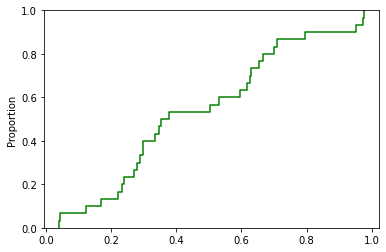


Histogram:


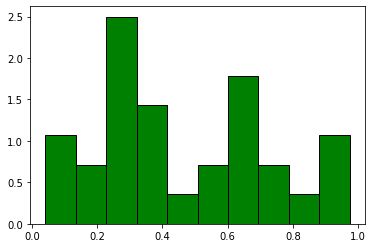


B:
Kolmogorov's criterion graph:


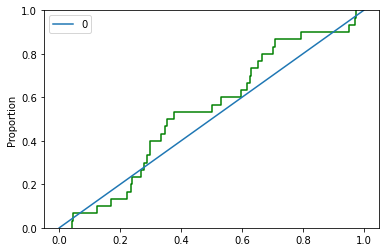

Kolmogorov distance :  0.157
Point :  0.71
The hypothesis is correct!


In [108]:
print("Task #1")
print("====================")
print("A:")
buildConfidenceIntervalA()
print("====================")
print("B:")
buildConfidenceIntervalB()
print("====================")
print("C:")
buildConfidenceIntervalC()
print("====================")
print("D:")
buildConfidenceIntervalD()
print("====================")
print("\nTask #2")
print("A:")
print("Empirical function:")
drawEmpiricalFunction()
print("\nHistogram:")
drawHistogram()
print("\nB:")
print("Kolmogorov's criterion graph:")
drawKolmogorovCriterion()
kolmogorovCriterion()